****Принятие решений в бизнесе - Проведение A/B-теста для крупного интерент магазина****

### Описание проекта

В данном проекте я выступаю аналитиком крупного интернет-магазина. Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.
Теперь мне необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Так же необходимо помнить о первичной и обязательной работе с данными - проверить их качество т.е. провести предобработку.

### Описание данных

***Данные для первой части***

Файл /datasets/hypothesis.csv

- `Hypothesis` — краткое описание гипотезы;


- `Reach` — охват пользователей по 10-балльной шкале;


- `Impact` — влияние на пользователей по 10-балльной шкале;


- `Confidence` — уверенность в гипотезе по 10-балльной шкале;


- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

***Данные для второй части***

Файл /datasets/orders.csv. 

- `transactionId` — идентификатор заказа;


- `visitorId` — идентификатор пользователя, совершившего заказ;


- `date` — дата, когда был совершён заказ;


- `revenue` — выручка заказа;


- `group` — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 

- `date` — дата;


- `group` — группа A/B-теста;


- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

***Цель проекта*** -  изучить данные А/В теста и интерпритировать результаты. В рамках исследования будут изучены следующие показатели: 
   
    1. Выручка
   
    2. Средний чек
   
    3. Среднее количество заказов

***План работы***

1. Загрузка, изучение данных. Подготовка данных к анализу.
2. Приоритизация гипотез.
3. Анализ A/B-теста.
4. Выводы.

### Загрузка и изучение данных. Подготовка данных к анализу

In [1]:
# Импортирую необходимые библеотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import datetime as dt

In [2]:
# Выгружаю данные
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [3]:
def describe_dataset_2(df, name):
    # Устанавливаем максимальную ширину отображаемого текста в колонке до 100 символов
    pd.options.display.max_colwidth = 1000

    print(f"=== {name}: Первые 5 строк ===")
    print(df.head())
    print("\n")
    
    print(f"=== {name}: Последние 5 строк ===")
    print(df.tail())
    print("\n")
    
    print(f"=== {name}: Информация о датасете ===")
    df.info()
    print("\n")
    
    
    
describe_dataset_2(hypothesis, "Hypothesis")
describe_dataset_2(orders, "Orders")
describe_dataset_2(visitors, "Visitors")

=== Hypothesis: Первые 5 строк ===
                                                                                                     Hypothesis  \
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                              Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   

   Reach  Impact  Confidence  Efforts  
0      3      10           8        6  
1      2       5           4       10  
2      8       3           7        3  
3      8       3           3        8  
4      3       1           1        1  


=== Hypothesis: Последние 5 стро

После вывода предварительной информации о датасете посмотрю колличество дубликатов для каждого датасета отдельно:

In [4]:
hypothesis.duplicated().sum()

0

In [5]:
orders.duplicated().sum()

0

In [6]:
visitors.duplicated().sum()

0

Отлично, дубликатов нет.

### Промежуточные выводы по предобработке данных

Я ознакомилась с данными. В датсете `hypothesis` всего 9 строк и 5 столбцов. В `orders` всего 1 197 строк и 5 столбца. В `visitors` всего 62 строки и 3 столбца.

Уже на данном этапе видны проблемы, которые необходимо устранить на этапе предобработке данных:

1. Некорректное наименование столбцов (не соотвествует snake_case);
2. Некорректные тип данных для некоторых столбцов.

Такие проблемы нормальны так как скорее всего в системе сбора данных наименование столбцов указаны в форме удобной для человека (а это названия с большой буквы или слитное написание название ID). Тип данных некорректен в столбцах содержащих даты, вероятно, произошел сбой при выгрузки данных. 


В целом, данные пригодны для дальнейшего анализа - нет пропущенных значений, а так же дубликатов, но необходима предобратка. 

### Проведение предобработки

Приведу столбцы с датами к корректному типу:

In [14]:
orders = pd.read_csv('orders.csv', parse_dates = ['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [16]:
visitors = pd.read_csv('visitors.csv', parse_dates = ['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Отлично, все столбцы имеют корректные тип данных.

Теперь исправлю наименования стоблцов:

In [17]:
hypothesis.columns = hypothesis.columns.str.lower()

In [18]:
orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace=True)

In [19]:
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [20]:
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [21]:
visitors.columns

Index(['date', 'group', 'visitors'], dtype='object')

Отлично, все столбцы имеют корректные наименования

### Вывод по предобработке данных

На данном этапе данные готовы к дальнейшей работе:

1. Выволнена проверка на дубликаты (их не оказалось)
2. При посмотрены данных с помощью метода `info()` сделан вывод об отсутсвие пропущенных значений
3. Изменены наименования столбцов в соотвествии с общепринятым и удобным для работы стилем.
4. Изменен тип данных данных в столбцах содержащих дату и время
5. Сделаны выводы о причинах проблем в данных

### Часть 1. Приоритизация гипотез.

В файле `hypothesis` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

****Задача:****

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.


- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.


- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

фреймворк ICE считается по следующей формуле:

In [22]:
from IPython.display import Image
Image(url='https://pictures.s3.yandex.net/resources/ice_score_2-27da3b9e-15cd-4f96-91a4-fefffd1d986e_1569198107.jpg')

In [26]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts']

hypothesis['ICE'] = hypothesis['ICE'].astype('float')

In [27]:
hypothesis['ICE'] = hypothesis['ICE'].round(2)
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


фреймворк RICE считается по следующей формуле:

In [28]:
from IPython.display import Image
Image(url='https://pictures.s3.yandex.net/resources/rice_score_1634305501.png')

In [29]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts']

hypothesis['RICE'] = hypothesis['RICE'].astype('float')

In [30]:
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### Объяснение изменений в приоритезации гипотез

1. Значительное повышение гипотезы "Добавить форму подписки на все основные страницы сайта":


`ICE`: 11.2


`RICE`: 112.0 (первая в приоритете)


Эта гипотеза значительно повысилась в приоритете при использовании RICE, потому что добавился фактор охвата пользователей (Reach). Если форма подписки доступна на всех основных страницах, она может привлечь много пользователей, что значительно увеличивает значение RICE.




2. Повышение гипотезы "Добавить блоки рекомендаций товаров на сайт":


`ICE`: 7.0


`RICE`: 56.0 (вторая в приоритете)


Подобно первой гипотезе, добавление блока рекомендаций может охватить большую аудиторию, особенно если он будет виден многим пользователям, что также увеличивает значение RICE.




3. Понижение гипотезы "Запустить акцию, дающую скидку на товар в день...":


`ICE`: 16.2 (первая в приоритете)


`RICE`: 16.2 (пятая в приоритете)


Хотя эта гипотеза была первой по ICE, она не показывает значительного охвата пользователей (Reach), что объясняет её понижение при использовании RICE.

При использовании фреймворка RICE в приоритизации гипотез добавляется фактор охвата (Reach), который значительно влияет на приоритет гипотез. Гипотезы, которые могут охватить большее количество пользователей, получают более высокие значения RICE и, следовательно, становятся более приоритетными. 

### Часть 2. Анализ A/B-теста

Результаты проведенного A/B-теста описаны в файлах `orders` и `visitors`.

***Задача:***

*Необходимо проанализировать A/B-тест:*


1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.


2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.


3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.


4. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.


5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.


6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.


7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.


8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.


9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.


10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.


11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.


12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.


13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.


14. Примить решение по результатам теста и объяснить его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

#### Построю график кумулятивной выручки по группам. Сделаю выводы и предположения

In [47]:
# Создаю кумулятивные данные по датам и группам
cumulative_revenue = orders.groupby(['date', 'group']).agg({'revenue': 'sum'}).groupby(level=['group']).cumsum().reset_index()

In [48]:
cumulative_revenue

,date,group,revenue
0,2019-08-01,A,148579
1,2019-08-01,B,101217
2,2019-08-02,A,242401
3,2019-08-02,B,266748
4,2019-08-03,A,354874
...,...,...,...
57,2019-08-29,B,5559398
58,2019-08-30,A,4022970
59,2019-08-30,B,5774631
60,2019-08-31,A,4084803


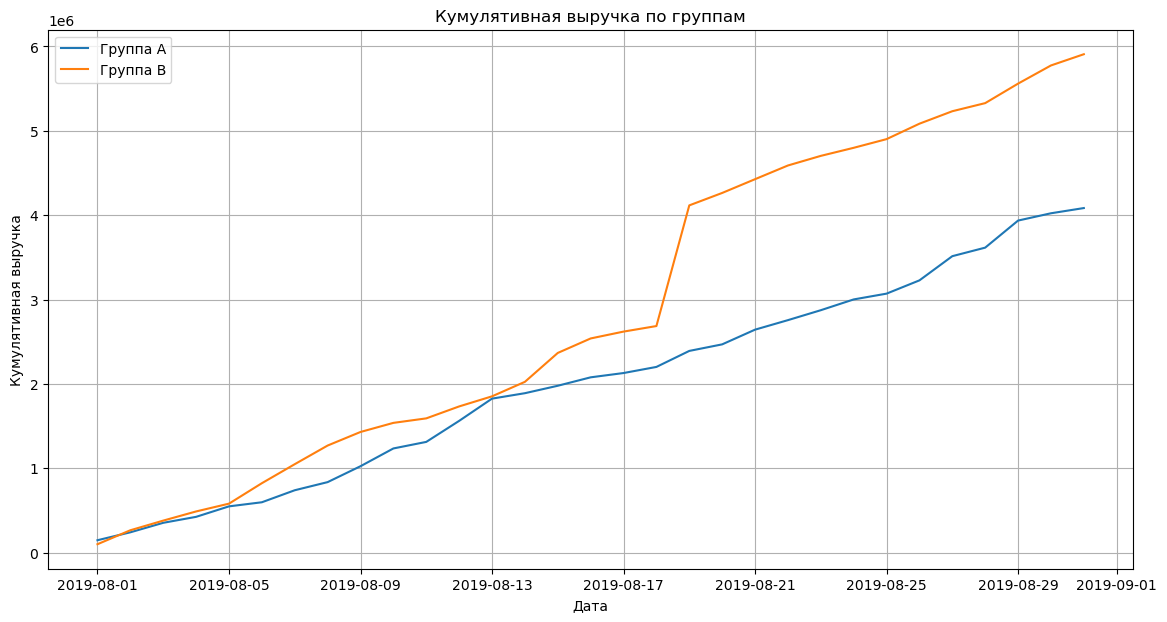

In [49]:
# Фильтрую данные для группы A и группы B
cumulative_revenue_a = cumulative_revenue[cumulative_revenue['group'] == 'A']
cumulative_revenue_b = cumulative_revenue[cumulative_revenue['group'] == 'B']

# Строю график кумулятивной выручки по группам
plt.figure(figsize=(14, 7))

# График для группы A
plt.plot(cumulative_revenue_a['date'],
         cumulative_revenue_a['revenue'],
         label='Группа A')

# График для группы B
plt.plot(cumulative_revenue_b['date'],
         cumulative_revenue_b['revenue'],
         label='Группа B')

plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend()
plt.grid(True)
plt.show()

***Выводы***

Кумулятивная выручка обеих групп увеличивается на протяжении всего теста, но для группы B наблюдается более крупный скачок выручки в середине теста. Это может указывать на наличие аномально больших заказов в этот период.

#### Построю график кумулятивного среднего чека по группам. Сделаю выводы и предположения.

In [50]:
# Создам кумулятивныt данныt по датам и группам
cumulative_data = (
    orders.groupby(['date', 'group']).agg({'transaction_id': 'count', 'revenue': 'sum'})
    .rename(columns={'transaction_id': 'transaction'})
    .groupby(level='group').cumsum().reset_index()
)

# Расчетаю кумулятивный средний чек
cumulative_data['average_check'] = cumulative_data['revenue'] / cumulative_data['transaction']

cumulative_data

,date,group,transaction,revenue,average_check
0,2019-08-01,A,24,148579,6190.791667
1,2019-08-01,B,21,101217,4819.857143
2,2019-08-02,A,44,242401,5509.113636
3,2019-08-02,B,45,266748,5927.733333
4,2019-08-03,A,68,354874,5218.735294
...,...,...,...,...,...
57,2019-08-29,B,596,5559398,9327.848993
58,2019-08-30,A,545,4022970,7381.596330
59,2019-08-30,B,620,5774631,9313.920968
60,2019-08-31,A,557,4084803,7333.578097


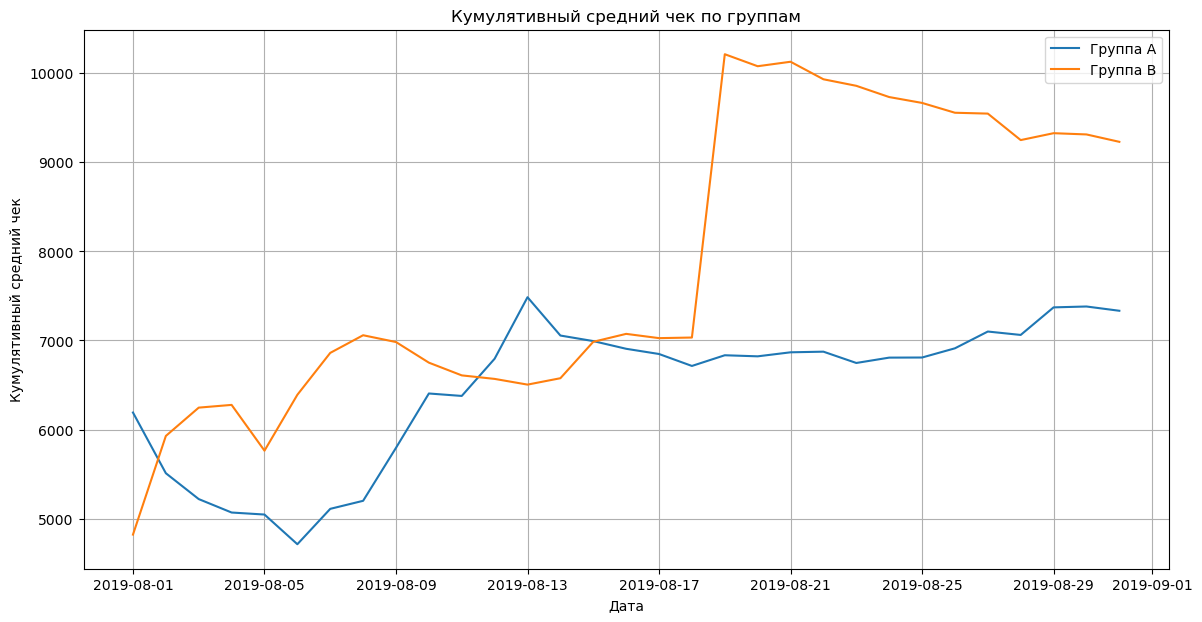

In [51]:
# Фильтрую данные для групп A и B
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

# Строю графика кумулятивного среднего чека
plt.figure(figsize=(14, 7))

# График для группы A
plt.plot(cumulative_data_a['date'],
         cumulative_data_a['average_check'],
         label='Группа A')

# График для группы B
plt.plot(cumulative_data_b['date'],
         cumulative_data_b['average_check'],
         label='Группа B')

plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.legend()
plt.grid(True)
plt.show()

***Выводы***

График кумулятивного среднего чека показывает, что после резкого увеличения среднего чека у группы B, чек стабилизируется и даже начинает снижаться к концу периода теста. Это также может подтверждать наличие аномальных заказов, после которых средний чек начал нормализоваться. Средний чек в группе A более стабилен.

#### Построю график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаю выводы и предположения.

Для построения графика относительных изменений среднего чека группы В к группе А используем ранее созданные таблицы `cumulative_data_a` и `cumulative_data_b`.

In [52]:
# Объединяю данные по дате
merged_data = pd.merge(cumulative_data_a, cumulative_data_b, on='date', suffixes=['_A', '_B'])
merged_data

,date,group_A,transaction_A,revenue_A,average_check_A,group_B,transaction_B,revenue_B,average_check_B
0,2019-08-01,A,24,148579,6190.791667,B,21,101217,4819.857143
1,2019-08-02,A,44,242401,5509.113636,B,45,266748,5927.733333
2,2019-08-03,A,68,354874,5218.735294,B,61,380996,6245.836066
3,2019-08-04,A,84,425699,5067.845238,B,78,489567,6276.500000
4,2019-08-05,A,109,549917,5045.110092,B,101,581995,5762.326733
5,2019-08-06,A,127,598401,4711.818898,B,129,824337,6390.209302
6,2019-08-07,A,145,740818,5109.089655,B,153,1049671,6860.594771
7,2019-08-08,A,161,837097,5199.360248,B,180,1270589,7058.827778
8,2019-08-09,A,177,1025603,5794.367232,B,205,1431401,6982.443902
9,2019-08-10,A,193,1236098,6404.652850,B,228,1539203,6750.890351


In [53]:
# Расчитываю относительное изменения кумулятивного среднего чека группы B к группе A
# Вычитаю 1, чтобы получить процентное изменение.
merged_data['relative_change'] = (merged_data['average_check_B'] / merged_data['average_check_A']) - 1
merged_data

,date,group_A,transaction_A,revenue_A,average_check_A,group_B,transaction_B,revenue_B,average_check_B,relative_change
0,2019-08-01,A,24,148579,6190.791667,B,21,101217,4819.857143,-0.221447
1,2019-08-02,A,44,242401,5509.113636,B,45,266748,5927.733333,0.075987
2,2019-08-03,A,68,354874,5218.735294,B,61,380996,6245.836066,0.196810
3,2019-08-04,A,84,425699,5067.845238,B,78,489567,6276.500000,0.238495
4,2019-08-05,A,109,549917,5045.110092,B,101,581995,5762.326733,0.142161
5,2019-08-06,A,127,598401,4711.818898,B,129,824337,6390.209302,0.356209
6,2019-08-07,A,145,740818,5109.089655,B,153,1049671,6860.594771,0.342821
7,2019-08-08,A,161,837097,5199.360248,B,180,1270589,7058.827778,0.357634
8,2019-08-09,A,177,1025603,5794.367232,B,205,1431401,6982.443902,0.205040
9,2019-08-10,A,193,1236098,6404.652850,B,228,1539203,6750.890351,0.054060


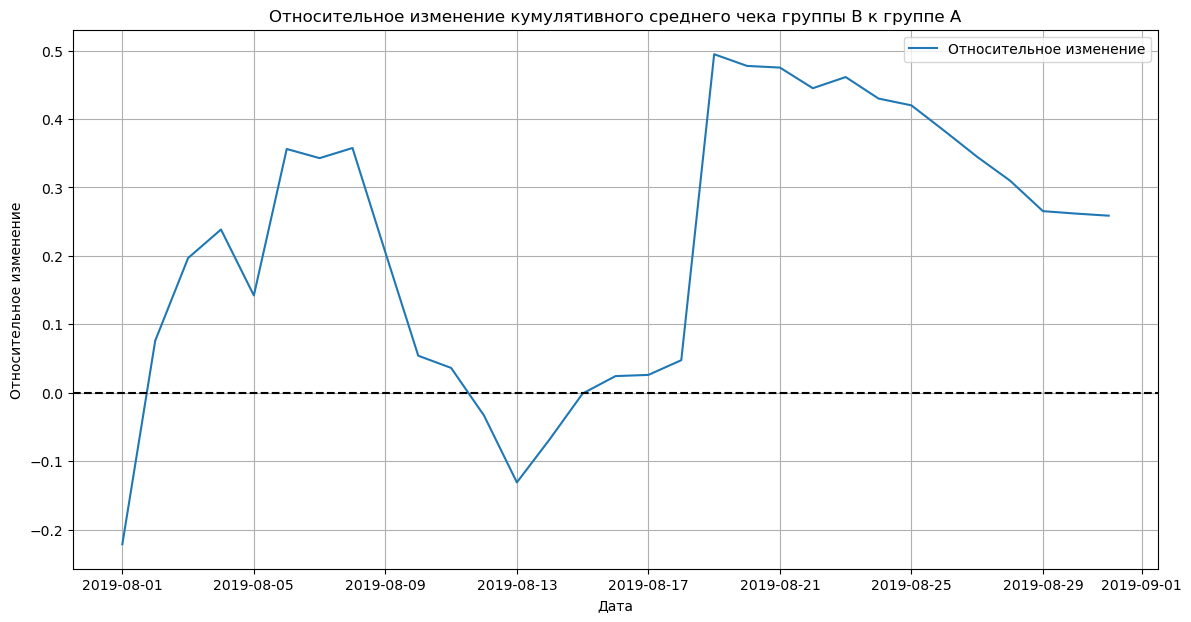

In [54]:
# Строю график относительного изменения кумулятивного среднего чека
plt.figure(figsize=(14, 7))
plt.plot(merged_data['date'], merged_data['relative_change'], label='Относительное изменение')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.legend()
plt.grid(True)
plt.show()

***Выводы***

График относительных изменений показывает, что после начальных колебаний, группа B значительно вырывается вперед, достигая пика, после чего следует спад. Снова, это подчеркивает потенциальное влияние аномально дорогих заказов в группе B.

#### Построю график кумулятивного среднего количества заказов на посетителя по группам. Сделаю выводы и предположения.

In [55]:
# Группирую заказы по дате и группе с подсчетом количества заказов и суммарной выручки
orders_aggregated = (
    orders.groupby(['date', 'group'])
    .agg({'transaction_id': 'count'})
    .rename(columns={'transaction_id': 'orders'}).reset_index()
)

orders_aggregated

,date,group,orders
0,2019-08-01,A,24
1,2019-08-01,B,21
2,2019-08-02,A,20
3,2019-08-02,B,24
4,2019-08-03,A,24
...,...,...,...
57,2019-08-29,B,20
58,2019-08-30,A,11
59,2019-08-30,B,24
60,2019-08-31,A,12


In [56]:
# Группирую. посетителей по дате и группе с подсчетом количества посетителей
visitors_aggregated = (
    visitors.groupby(['date', 'group'])
    .agg({'visitors': 'sum'}).reset_index()
)
visitors_aggregated

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,619
3,2019-08-02,B,581
4,2019-08-03,A,507
...,...,...,...
57,2019-08-29,B,531
58,2019-08-30,A,490
59,2019-08-30,B,490
60,2019-08-31,A,699


In [57]:
# Объединяю данные о заказах и посетителях
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])

cumulative_data

,date,group,orders,visitors
0,2019-08-01,A,24,719
1,2019-08-01,B,21,713
2,2019-08-02,A,20,619
3,2019-08-02,B,24,581
4,2019-08-03,A,24,507
...,...,...,...,...
57,2019-08-29,B,20,531
58,2019-08-30,A,11,490
59,2019-08-30,B,24,490
60,2019-08-31,A,12,699


In [58]:
# Расчитываю кумулятивное количество заказов и посетителей
cumulative_data['cumulative_orders'] = cumulative_data.groupby('group')['orders'].cumsum()
cumulative_data['cumulative_visitors'] = cumulative_data.groupby('group')['visitors'].cumsum()

# Расчитываю кумулятивное среднее количества заказов на посетителя
cumulative_data['average_orders_per_visitor'] = cumulative_data['cumulative_orders'] / cumulative_data['cumulative_visitors']

cumulative_data

,date,group,orders,visitors,cumulative_orders,cumulative_visitors,average_orders_per_visitor
0,2019-08-01,A,24,719,24,719,0.033380
1,2019-08-01,B,21,713,21,713,0.029453
2,2019-08-02,A,20,619,44,1338,0.032885
3,2019-08-02,B,24,581,45,1294,0.034776
4,2019-08-03,A,24,507,68,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,20,531,596,17708,0.033657
58,2019-08-30,A,11,490,545,18037,0.030216
59,2019-08-30,B,24,490,620,18198,0.034070
60,2019-08-31,A,12,699,557,18736,0.029729


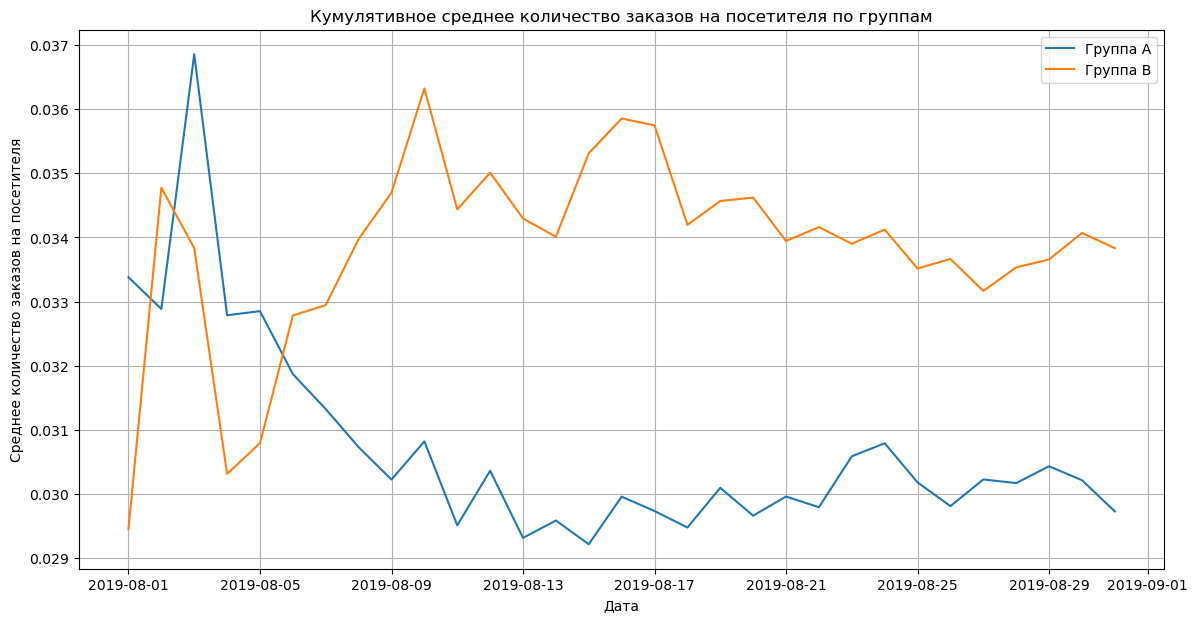

In [59]:
# Фильтруем данные для групп A и B
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

# Строим график кумулятивного среднего количества заказов на посетителя по группам
plt.figure(figsize=(14, 7))
plt.plot(cumulative_data_a['date'], cumulative_data_a['average_orders_per_visitor'], label='Группа A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['average_orders_per_visitor'], label='Группа B')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend()
plt.grid(True)
plt.show()

***Вывод***

Группа А показывает более стабильные изменения. У Группы В наблюдается скачкообразность, что может говорить о наличии аномальных значений

#### Построю график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаю выводы и предположения.

Для выполнения этого шага использую ранее созданные таблицы `cumulative_data_a` и `cumulative_data_b`.

In [60]:
# Объединяю данные по датам для групп A и B
merged_cumulative_orders = cumulative_data_a[['date', 'average_orders_per_visitor']].merge(
    cumulative_data_b[['date', 'average_orders_per_visitor']],
    on='date',
    suffixes=['_A', '_B']
)
merged_cumulative_orders

,date,average_orders_per_visitor_A,average_orders_per_visitor_B
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793
5,2019-08-06,0.031870,0.032783
6,2019-08-07,0.031324,0.032946
7,2019-08-08,0.030731,0.033975
8,2019-08-09,0.030225,0.034699
9,2019-08-10,0.030821,0.036323


In [61]:
# Расчтиваю относительное изменение кумулятивного среднего количества заказов на посетителя
merged_cumulative_orders['relative_change'] = (
    merged_cumulative_orders['average_orders_per_visitor_B'] / merged_cumulative_orders['average_orders_per_visitor_A'] - 1
)
merged_cumulative_orders

,date,average_orders_per_visitor_A,average_orders_per_visitor_B,relative_change
0,2019-08-01,0.033380,0.029453,-0.117637
1,2019-08-02,0.032885,0.034776,0.057503
2,2019-08-03,0.036856,0.033833,-0.082045
3,2019-08-04,0.032787,0.030315,-0.075398
4,2019-08-05,0.032851,0.030793,-0.062659
5,2019-08-06,0.031870,0.032783,0.028655
6,2019-08-07,0.031324,0.032946,0.051764
7,2019-08-08,0.030731,0.033975,0.105562
8,2019-08-09,0.030225,0.034699,0.147998
9,2019-08-10,0.030821,0.036323,0.178524


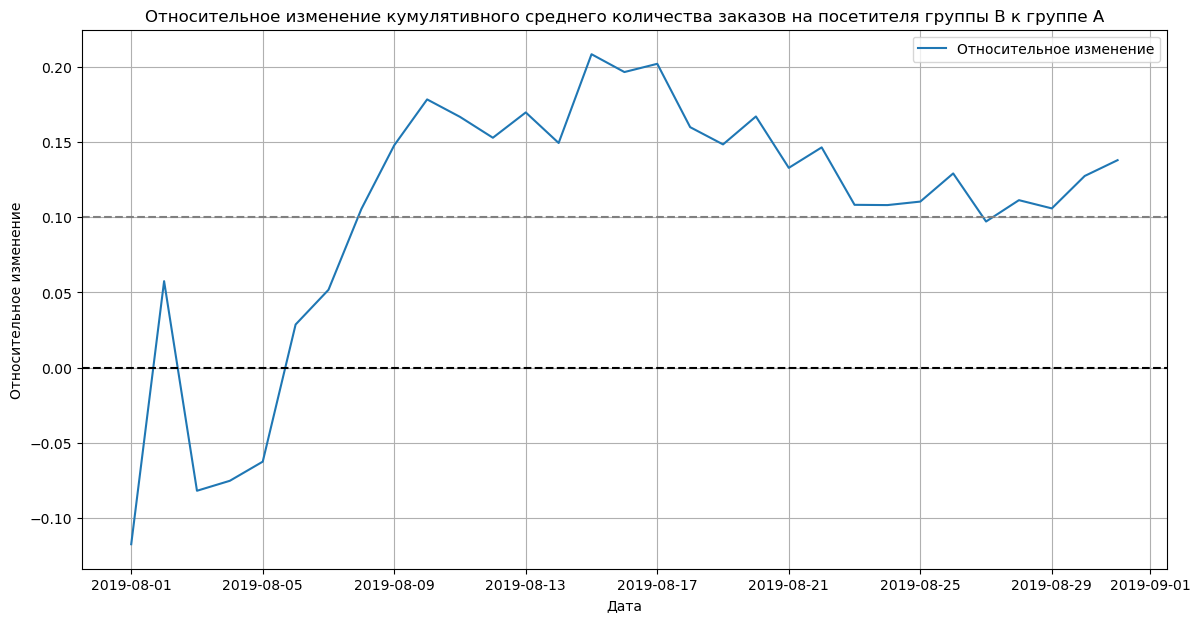

In [62]:
# Строю график относительного изменения
plt.figure(figsize=(14, 7))
plt.plot(merged_cumulative_orders['date'], merged_cumulative_orders['relative_change'], label='Относительное изменение')
plt.axhline(y=0, color='black', linestyle='--')  # Линия нулевого изменения для наглядности
plt.axhline(y=0.1, color='gray', linestyle='--')  # Дополнительная линия для оценки значимого отклонения
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.legend()
plt.grid(True)
plt.show()

***Выводы***

Резкие колебания, особенно в начале теста, могут быть связаны с наличием аномальных заказов. Устойчивый рост относительного изменения к концу теста может свидетельствовать о потенциальной эффективности изменений, внедренных в группе B.

#### Построю точечный график количества заказов по пользователям. Сделаю выводы и предположения.

In [63]:
# Подсчет количества заказов по каждому пользователю
orders_per_user = orders.groupby('visitor_id').agg({'transaction_id': 'count'}).reset_index()
orders_per_user.columns = ['visitor_id', 'orders']

orders_per_user

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


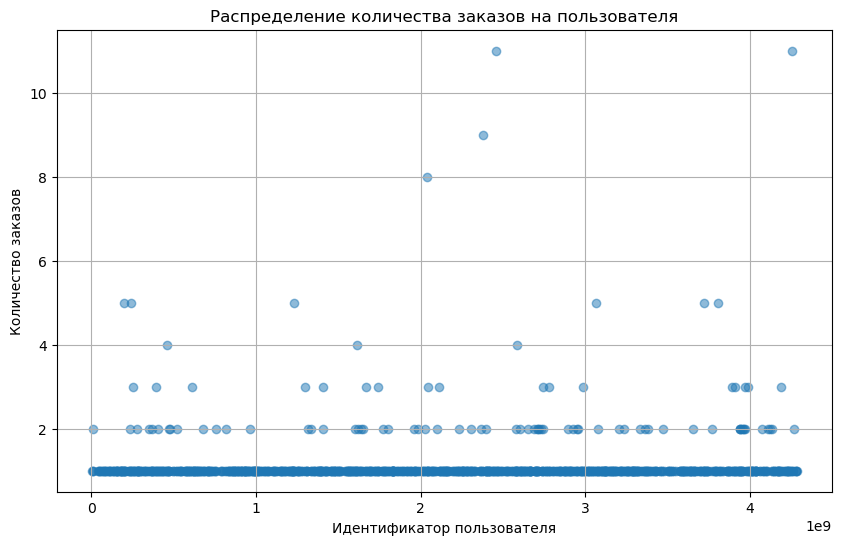

In [64]:
# Построение точечного графика
plt.figure(figsize=(10, 6))
plt.scatter(orders_per_user['visitor_id'], orders_per_user['orders'], alpha=0.5)
plt.title('Распределение количества заказов на пользователя')
plt.xlabel('Идентификатор пользователя')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()

***Выводы***

Большинство пользователей совершили всего один заказ. Это видно по большому количеству точек на уровне 1 на оси y. Несколько пользователей совершили более одного заказа, и их точки располагаются выше на графике. Это указывает на повторные покупки.
Аномальные значения можно заметить в верхней части графика, где некоторые пользователи сделали значительно больше заказов (более 10), чем большинство. Точки, которые значительно отклоняются от основной массы данных, могут указывать на потенциальных аномальных пользователей.

#### Посчитаю 95-й и 99-й перцентили количества заказов на пользователя. Выберу границу для определения аномальных пользователей.

Для расчета перцентилей используюю ранее созданую таблицу с заказами на пользователя `orders_per_user`

In [65]:
# Расчет перцентилей
percentiles = orders_per_user['orders'].quantile([0.95, 0.99])

In [66]:
percentiles[0.95]

2.0

In [67]:
percentiles[0.99]

4.0

In [68]:
# Фильтрация покупателей, совершивших не более 2 заказов
filtered_orders = orders[~orders['visitor_id'].isin(orders_per_user[orders_per_user['orders'] > 2]['visitor_id'])]

# Расчет потери данных
# Всего заказов
total_count = len(orders)

# Количество заказов после фильтрации
filtered_count = len(filtered_orders)

# Подсчет потери данных
data_loss_1 = total_count - filtered_count

# Подсчет потери данных в процентах
data_loss_2 = ((total_count - filtered_count) / total_count) * 100

# Вывод
print(f"Исходное количество заказов: {total_count}")
print(f"Количество заказов после фильтрации: {filtered_count}")
print(f"Потеря данных: {data_loss_1}")
print(f"Потеря данных в процентах: {data_loss_2:.2f}%")

Исходное количество заказов: 1197
Количество заказов после фильтрации: 1065
Потеря данных: 132
Потеря данных в процентах: 11.03%


In [69]:
# Фильтрация покупателей, совершивших не более 4 заказов
filtered_orders = orders[~orders['visitor_id'].isin(orders_per_user[orders_per_user['orders'] > 4]['visitor_id'])]

# Расчет потери данных
# Всего заказов
total_count = len(orders)

# Количество заказов после фильтрации
filtered_count = len(filtered_orders)

# Подсчет потери данных
data_loss_1 = total_count - filtered_count

# Подсчет потери данных в процентах
data_loss_2 = ((total_count - filtered_count) / total_count) * 100

# Вывод
print(f"Исходное количество заказов: {total_count}")
print(f"Количество заказов после фильтрации: {filtered_count}")
print(f"Потеря данных: {data_loss_1}")
print(f"Потеря данных в процентах: {data_loss_2:.2f}%")

Исходное количество заказов: 1197
Количество заказов после фильтрации: 1128
Потеря данных: 69
Потеря данных в процентах: 5.76%


***Вывод***

Можно было бы отсечь пользователей совершивших более 2 заказов (95-й перцентиль) так как это более классический выбор и потеря данных была бы всего 11%, но я выберу отсечь пользователей совершивших более 4 заказов (99-й перцентиль) так как согласно графику, пользователей совершивших несколько повторных покупок достаточно много. Я думаю, что эти данные пригодятся в дальнейшем анализе.

#### Построю точечный график стоимостей заказов. Сделаю выводы и предположения.

Для построения графика стоимости заказов использую исходный датафрем `orders`, который хранить информацию о каждом заказе.

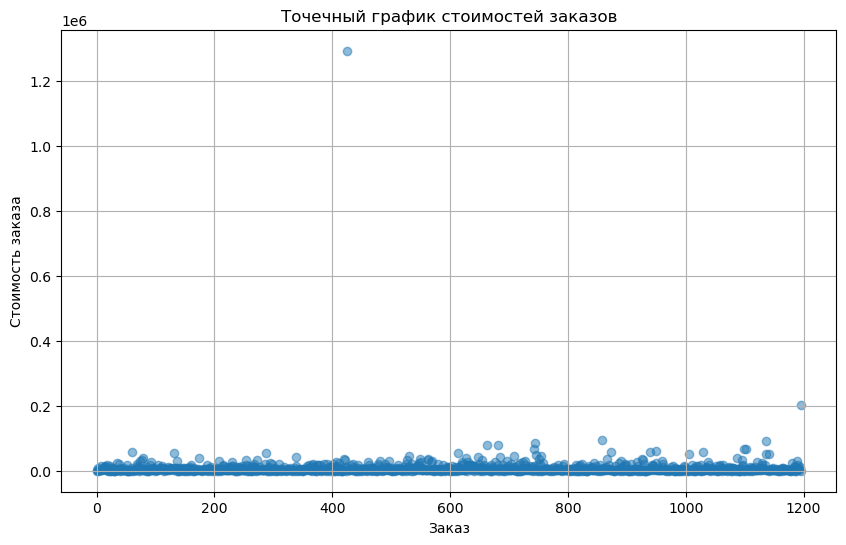

In [70]:
plt.figure(figsize=(10, 6))
# C помощью range(len(orders)) нагляднее распределяю заказы на оси X
plt.scatter(range(len(orders)), orders['revenue'], alpha=0.5)
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Заказ')
plt.ylabel('Стоимость заказа')
plt.grid(True)
plt.show()

***Вывод***

Основная масса точек сконцентрирована у нижней границы графика, значит большинство заказов имеют невысокую стоимость. Это типично для большинства розничных интернет-магазинов, где большая часть заказов состоит из стандартных покупок. Несколько точек, значительно отделяющихся от основной массы (особенно та, что находится в верхней части графика), могут указывать на аномально дорогие заказы. 

#### Посчитаю 95-й и 99-й перцентили стоимости заказов. Выберу границу для определения аномальных заказов.

In [71]:
# Расчет перцентилей для стоимости заказов
percentiles = orders['revenue'].quantile([0.95, 0.99])

In [72]:
round(percentiles[0.95])

28000

In [73]:
round(percentiles[0.99],2)

58233.2

In [74]:
# Расчет потери данных
# Всего заказов
total_count = len(orders)

# Фильтрация заказов, стоимость которых не превышает 28 000 
filtered_orders = orders[orders['revenue'] <= 28000]

# Количество заказов после фильтрации
filtered_count = len(filtered_orders)

# Подсчет потери данных
data_loss_1 = total_count - filtered_count

# Подсчет потери данных в процентах
data_loss_2 = ((total_count - filtered_count) / total_count) * 100

print(f"Исходное количество заказов: {total_count}")
print(f"Количество заказов после фильтрации: {filtered_count}")
print(f"Потеря данных: {data_loss_1}")
print(f"Потеря данных в процентах: {data_loss_2:.2f}%")

Исходное количество заказов: 1197
Количество заказов после фильтрации: 1137
Потеря данных: 60
Потеря данных в процентах: 5.01%


In [75]:
# Расчет потери данных
# Всего заказов
total_count = len(orders)

# Фильтрация заказов, стоимость которых не превышает 58 233 
filtered_orders = orders[orders['revenue'] <= 58233]

# Количество заказов после фильтрации
filtered_count = len(filtered_orders)

# Подсчет потери данных
data_loss_1 = total_count - filtered_count

# Подсчет потери данных в процентах
data_loss_2 = ((total_count - filtered_count) / total_count) * 100

print(f"Исходное количество заказов: {total_count}")
print(f"Количество заказов после фильтрации: {filtered_count}")
print(f"Потеря данных: {data_loss_1}")
print(f"Потеря данных в процентах: {data_loss_2:.2f}%")

Исходное количество заказов: 1197
Количество заказов после фильтрации: 1185
Потеря данных: 12
Потеря данных в процентах: 1.00%


***Вывод***

В данном случае, я считаю, лучше отсечь заказы, стоимость которых не превышает 28 000 так как потеря данных будет приемлимая - 5% и аномальные заказы будут убраны из выборки. Если отсечь заказы превышающие 58 233, то потеря будет незначительная для анализа - 1% и аномалии будут сохранены в выборке.

#### Посчитаю статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаю выводы и предположения.

Для подсчета статистической значимости "сырых" данных воспользуюсь непарметрическим тестом Уилкоксона-Манна-Уитни так как он подходит для данных, содержащих аномальные значения

Нулевая гипотеза (H0): Нет статистически значимой разницы в среднем количестве заказов на посетителя между группой A и группой B.

Альтернативная гипотеза (H1): Есть статистически значимая разница в среднем количестве заказов на посетителя между группой A и группой B. Это указывает на то, что изменения, внедрённые в группе B, оказали влияние на поведение посетителей.

In [76]:
# Создам таблицы отдельно для каждой группы
orders_A = orders[orders['group'] == 'A']
orders_B = orders[orders['group'] == 'B']
print(f"Заказы группы А {orders_A}")
print(f"Заказы группы B {orders_B}")

Заказы группы А       transaction_id  visitor_id       date  revenue group
2         2961555356  4069496402 2019-08-15      400     A
7         2626614568    78758296 2019-08-15     1044     A
8         1576988021   295230930 2019-08-15    13710     A
10        3649131742   879864040 2019-08-15     4008     A
12        2809384911  3213223594 2019-08-15     7370     A
...              ...         ...        ...      ...   ...
1187      2274188238   132143192 2019-08-14      750     A
1188      1692103379  1022829655 2019-08-14      112     A
1193      2203539145   370388673 2019-08-14     3190     A
1194      1807773912   573423106 2019-08-14    10550     A
1195      1947021204  1614305549 2019-08-14      100     A

[557 rows x 5 columns]
Заказы группы B       transaction_id  visitor_id       date  revenue group
0         3667963787  3312258926 2019-08-15     1650     B
1         2804400009  3642806036 2019-08-15      730     B
3         3797467345  1196621759 2019-08-15     9759     B


In [77]:
# Считаю колличество заказов на каждого пользователя для каждой группы отдельно
orders_per_user_A = orders_A.groupby('visitor_id').agg({'transaction_id': 'count'}).reset_index()
orders_per_user_B = orders_B.groupby('visitor_id').agg({'transaction_id': 'count'}).reset_index()
print(f"Количество заказов на пользователя группы А {orders_per_user_A}")
print(f"Количество заказов на пользователя группы B {orders_per_user_B}")

Количество заказов на пользователя группы А      visitor_id  transaction_id
0       8300375               1
1      11685486               1
2      54447517               1
3      66685450               1
4      78758296               1
..          ...             ...
498  4243832526               1
499  4256040402               7
500  4259830713               1
501  4266935830               1
502  4278982564               1

[503 rows x 2 columns]
Количество заказов на пользователя группы B      visitor_id  transaction_id
0       5114589               1
1       6958315               1
2       8300375               1
3      39475350               1
4      47206413               1
..          ...             ...
581  4258103007               1
582  4266935830               1
583  4279090005               1
584  4281247801               1
585  4283872382               1

[586 rows x 2 columns]


In [78]:
# Сохраняю только количество заказов для каждой группы
group_A = orders_per_user_A['transaction_id']
group_B = orders_per_user_B['transaction_id']
print(f"Количество заказов группы А {group_A}")
print(f"Количество заказов группы B {group_B}")

Количество заказов группы А 0      1
1      1
2      1
3      1
4      1
      ..
498    1
499    7
500    1
501    1
502    1
Name: transaction_id, Length: 503, dtype: int64
Количество заказов группы B 0      1
1      1
2      1
3      1
4      1
      ..
581    1
582    1
583    1
584    1
585    1
Name: transaction_id, Length: 586, dtype: int64


In [79]:
# провожу тест
alpha = 0.05

# Выбираю параметр two-sided так как мне необходимо выяснить есть ли стат. значемые различия
results = st.mannwhitneyu(group_A, group_B, True, 'two-sided')

print(f"p-значение: {results.pvalue}") 

if results.pvalue < alpha:
    print('Есть статистически значимые различия в среднем количестве заказов на посетителя между группами A и B')
else:
    print(
        'Нет статистически значимых различий в среднем количестве заказов на посетителя между группами A и B'
    ) 

p-значение: 0.8900592924670534
Нет статистически значимых различий в среднем количестве заказов на посетителя между группами A и B


***Вывод***

Результат теста Уилкоксона-Манна-Уитни указывает на то, что нет статистически значимых различий в среднем количестве заказов на посетителя между группами A и B. Это означает, что различия, которые есть  между группами, скорее всего, не могут быть результатом эффекта, внесенного изменениями в группе B.

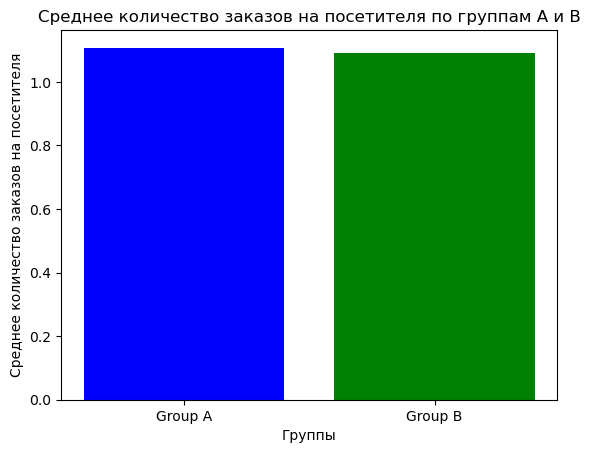

In [80]:
# Считаю среднеее количество заказов на посетителя для каждой группы
mean_orders_A = orders_per_user_A['transaction_id'].mean()
mean_orders_B = orders_per_user_B['transaction_id'].mean()

# Визуализация средних значений
plt.bar(['Group A', 'Group B'], [mean_orders_A, mean_orders_B], color=['blue', 'green'])
plt.xlabel('Группы')
plt.ylabel('Среднее количество заказов на посетителя')
plt.title('Среднее количество заказов на посетителя по группам A и B')
plt.show()


In [81]:
alpha = 0.05

# Проведение теста Манна-Уитни
results = st.mannwhitneyu(orders_per_user_A['transaction_id'], orders_per_user_B['transaction_id'], True, 'two-sided')

print(f"p-значение: {results.pvalue}")


if results.pvalue < alpha:
    print('Есть статистически значимые различия в среднем количестве заказов на посетителя между группами A и B')
else:
    print('Нет статистически значимых различий в среднем количестве заказов на посетителя между группами A и B')
    

p-значение: 0.8900592924670534
Нет статистически значимых различий в среднем количестве заказов на посетителя между группами A и B


#### Посчитаю статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаю выводы и предположения.

Для выполнения этой задачи проведу действия аналогичные пункту 10

In [82]:
# Разделю данные на группы A и B
orders_A = orders[orders['group'] == 'A']['revenue']
orders_B = orders[orders['group'] == 'B']['revenue']

In [83]:
# Проведение теста Уилкоксона-Манна-Уитни

alpha = 0.05


results = st.mannwhitneyu(group_A, group_B, True, 'two-sided')

print(f"p-значение: {results.pvalue}") 

if results.pvalue < alpha:
    print('Есть статистически значимые различия в среднем чеке заказа между группами A и B')
else:
    print(
        'Нет статистически значимых различий в среднем чеке заказа между группами A и B'
    ) 

p-значение: 0.8900592924670534
Нет статистически значимых различий в среднем чеке заказа между группами A и B


***Вывод***

Результат показал, что нет статистически значимых различий в среднем чеке заказа между группами A и B. 

#### Посчитаю статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаю выводы и предположения.

Для работы с очищенными данными использую датафремы из пункта 10 `orders_per_user_A` и `orders_per_user_B`. Уберу из них пользователей, совершивших более 4-х заказов и проделаю шаги из пункта 10.

In [84]:
orders_per_user_A = orders_per_user_A[orders_per_user_A['transaction_id'] <= 4]
orders_per_user_B = orders_per_user_B[orders_per_user_B['transaction_id'] <= 4]

In [85]:
group_A = orders_per_user_A['transaction_id']
group_B = orders_per_user_B['transaction_id']

In [86]:

alpha = 0.05


results = st.mannwhitneyu(group_A, group_B, True, 'two-sided')

print(f"p-значение: {results.pvalue}") 

if results.pvalue < alpha:
    print('Есть статистически значимые различия в среднем количестве заказов на посетителя по "очищенным" данным между группами A и B')
else:
    print(
        'Нет статистически значимых различий в среднем количестве заказов на посетителя по "очищенным" данным между группами A и B'
    ) 

p-значение: 0.9670227883402754
Нет статистически значимых различий в среднем количестве заказов на посетителя по "очищенным" данным между группами A и B


***Вывод***

Статистических различий нет в среднем количестве заказов нет. Это значит, что внедренные изменения не повлияли на количество заказов.

#### Посчитаю статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаю выводы и предположения.

Проведу действия аналогичные предыдущим пунктам, но уберу заказы стомость, которых превышет 28 000

In [87]:
orders = orders[orders['revenue'] <= 28000]
orders_A = orders[orders['group'] == 'A']['revenue']
orders_B = orders[orders['group'] == 'B']['revenue']

In [88]:
alpha = 0.05


results = st.mannwhitneyu(group_A, group_B, True, 'two-sided')

print(f"p-значение: {results.pvalue}") 

if results.pvalue < alpha:
    print('Есть статистически значимые различия в среднем чеке заказа по "очищенным" данным между группами A и B')
else:
    print(
        'Нет статистически значимых различий в среднем чеке заказа по "очищенным" данным между группами A и B'
    ) 

p-значение: 0.9670227883402754
Нет статистически значимых различий в среднем чеке заказа по "очищенным" данным между группами A и B


***Выводы***

Статистически значемых различий нет. Это значит, что внесенные изменения в группу B не повлияли на уровень среднего чека.

#### Теперь необходимо принять решение по результатам теста и объяснить его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

На основе полученного результата не было обнаружено значимых изменений в поведении клиентов (не наблюдалось статистически значимых различий ни в среднем количестве заказов на посетителя, ни в среднем чеке заказа после удаления аномалий), продолжение теста вероятно не приведет к другим результатам. Это может указывать на то, что внесенные изменения не оказывают значимого влияния на изучаемые показатели. Необходимо остановить тест и зафиксировать отсутсвие различий между группами.